In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/u/yashjain/anaconda3/envs/vitessce-env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load the data
data = pd.read_csv(os.getcwd() + '/paper-analysis-data/fig-2c-source-data.csv')
data

,Team,Dataset,NSD(t=0),NSD(t=1),clDice,ASSD,Dice
0,Baseline,kidney 5,0.805118,0.866844,0.716810,5.816130,0.892196
1,Baseline,kidney 6,0.438169,0.664741,0.543936,6.189306,0.566603
2,Team 1,kidney 5,0.895120,0.956892,0.832980,1.313225,0.928338
3,Team 1,kidney 6,0.774105,0.925248,0.785881,0.787672,0.828910
4,Team 2,kidney 5,0.043141,0.085504,0.013369,40.507767,0.011903
5,Team 2,kidney 6,0.755959,0.847903,0.799128,2.744480,0.675823
6,Team 3,kidney 5,0.832746,0.895866,0.749280,10.855189,0.897127
7,Team 3,kidney 6,0.727912,0.884417,0.742753,1.091851,0.817381
8,Team 4,kidney 5,0.884931,0.942336,0.845677,1.892529,0.929639
9,Team 4,kidney 6,0.712189,0.862268,0.734168,1.418298,0.814399


In [3]:
# Normalize the 'assd' column between 0 and 1
min_assd = data['ASSD'].min()
max_assd = data['ASSD'].max()
data['ASSD_Normalized'] = (data['ASSD'] - min_assd) / (max_assd - min_assd)

In [4]:
# drop column ASSD
data = data.drop(columns=['ASSD'])

# Rename column ASSD_Normalized to ASSD
data = data.rename(columns={'ASSD_Normalized': 'ASSD'})

In [5]:
data

,Team,Dataset,NSD(t=0),NSD(t=1),clDice,Dice,ASSD
0,Baseline,kidney 5,0.805118,0.866844,0.716810,0.892196,0.126597
1,Baseline,kidney 6,0.438169,0.664741,0.543936,0.566603,0.135992
2,Team 1,kidney 5,0.895120,0.956892,0.832980,0.928338,0.013231
3,Team 1,kidney 6,0.774105,0.925248,0.785881,0.828910,0.000000
4,Team 2,kidney 5,0.043141,0.085504,0.013369,0.011903,1.000000
5,Team 2,kidney 6,0.755959,0.847903,0.799128,0.675823,0.049265
6,Team 3,kidney 5,0.832746,0.895866,0.749280,0.897127,0.253462
7,Team 3,kidney 6,0.727912,0.884417,0.742753,0.817381,0.007658
8,Team 4,kidney 5,0.884931,0.942336,0.845677,0.929639,0.027816
9,Team 4,kidney 6,0.712189,0.862268,0.734168,0.814399,0.015877


In [6]:
# Reformat data for plotting
reshaped_df = pd.melt(data, id_vars=['Team', 'Dataset'], value_vars=['NSD(t=0)', 'NSD(t=1)', 'clDice', 'ASSD', 'Dice'], var_name='Metric', value_name='Value')

In [7]:
reshaped_df

,Team,Dataset,Metric,Value
0,Baseline,kidney 5,NSD(t=0),0.805118
1,Baseline,kidney 6,NSD(t=0),0.438169
2,Team 1,kidney 5,NSD(t=0),0.895120
3,Team 1,kidney 6,NSD(t=0),0.774105
4,Team 2,kidney 5,NSD(t=0),0.043141
5,Team 2,kidney 6,NSD(t=0),0.755959
6,Team 3,kidney 5,NSD(t=0),0.832746
7,Team 3,kidney 6,NSD(t=0),0.727912
8,Team 4,kidney 5,NSD(t=0),0.884931
9,Team 4,kidney 6,NSD(t=0),0.712189


<Figure size 1200x800 with 0 Axes>

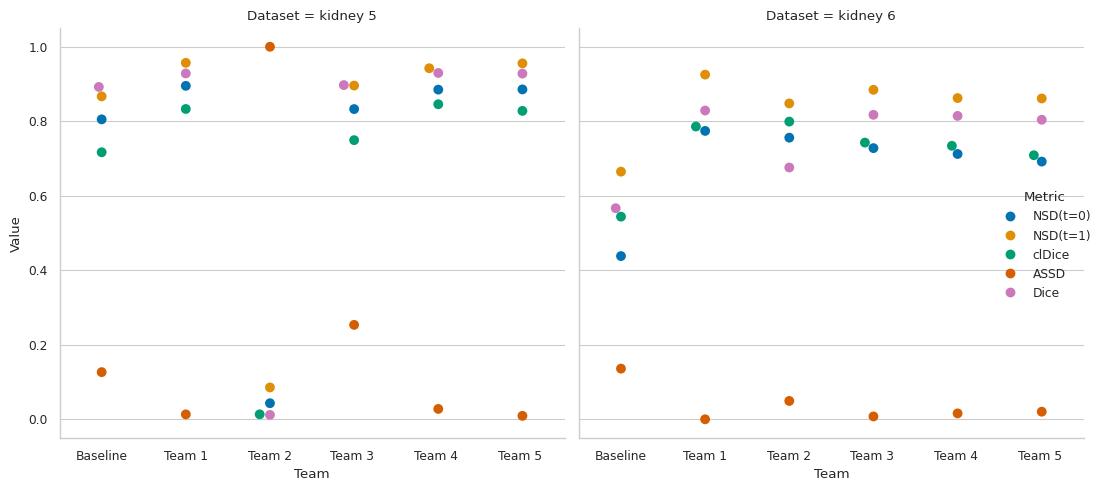

In [13]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid", context="paper")
sns.catplot(data=reshaped_df, x="Team", y="Value", hue="Metric", kind="swarm", col="Dataset", legend_out=True, palette='colorblind', s=50)

plt.tight_layout()

plt.savefig('metrics-plot.png', dpi=1200)
plt.savefig('metrics-plot.svg', dpi=1200)

plt.show()